# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#load and inspect the data
df = 0
df = pd.read_csv("reg_data.csv")
#raise NotImplementedError()
df

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [3]:
assert df.shape == (100,2)

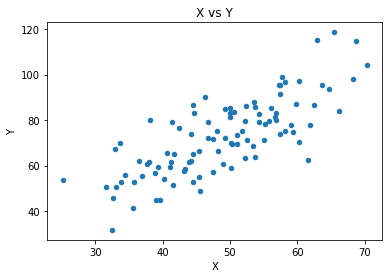

In [4]:
#plot the data (scatter)
x= df['X'].values
y= df['Y'].values
df.plot.scatter(x= 'X', y= 'Y', title= "X vs Y")
plt.show()


#raise NotImplementedError()

#### Line above shows positive correlation between X and Y

In [5]:
# YOUR CODE HERE
x_train, x_test, y_train, y_test = train_test_split(df.X, df.Y, test_size= 0.2, random_state= 0)
print(y_train)
#raise NotImplementedError()

43     61.424710
62     86.098291
3      71.546632
71     63.642399
45     45.570589
         ...    
96     72.111832
67     95.536687
64     69.899682
47     87.994453
44    115.244153
Name: Y, Length: 80, dtype: float64


In [6]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [7]:
#implement a least squares function to find a, b

x_mean = x_train.mean()
y_mean = y_train.mean()
b_upper = 0
#(( x_train - x_mean) * (y_train - y_mean)).sum()
b_lower = 0
#((x_train - x_mean)**2).sum()
for i in range(x_train.shape[0]):
    b_upper+= (x_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    b_lower+=  (x_train.values[i] - x_mean)**2
    

b = b_upper / b_lower
a = y_mean - (b * x_mean)



#raise NotImplementedError()
print(b)
print(a)

1.3450919020620415
6.687439682550206


In [9]:
assert abs(a - 7.72) <=0.03
assert abs(b - 1.32) <=0.03

AssertionError: 

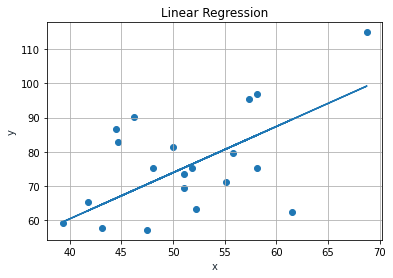

In [10]:
x = np.array(x_test)
y= np.array(y_test)

plt.scatter(x, y)
line= b*x +a

plt.plot(x, line)
plt.title('Linear Regression')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.grid()
plt.show()


In [11]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

In [ ]:
# YOUR CODE HERE


#raise NotImplementedError()

In [12]:
#Separate your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
df1= pd.DataFrame({'line': line, 'y_test': y_test})
df2= df1[df1['line']> df1['y_test']]
df3= df1[df1['line']<= df1['y_test']]

# YOUR CODE HERE

class_0 = df2['y_test']
class_1 = df3['y_test']       

class_0 = np.array(class_0)
class_1 = np.array(class_1)

print(class_0.shape)
print(class_1.shape)


(11,)
(9,)


In [13]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()

In [14]:
# get the total error for the classes

err = y_test - a - b*x
err= err.abs().sum()

err
# YOUR CODE HERE
#raise NotImplementedError()


201.82447860643398

In [15]:
assert err - 201 < 20